<a href="https://colab.research.google.com/github/Huniiiii/Data-Analysis-Using-Pandas--2/blob/main/DataAnalysisExercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We will explore TMDB movie dataset which contains information about 10,000 movies.

# Note:
# Certain columns, like cast and genres, contain multiple values separated by pipe (|) character.
# There are some odd characters in the cast column
# The final two columns ending with "_adj" show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [ ]:
# import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set style
sns.set_style('darkgrid')

In [ ]:
## Q1. Movies which made most and least profit (maybe top 3 vs bottom3)

## Q2. Movies market growth trends (Total buget and revenue over time)

## Q3. The average length of their movies and top 3 longest and bottom  shortest

## Q4. how many movies are released each year

## Q5. Most active director and his favorite actors

In [ ]:
df_master = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataAnalysis Exercise 2/tmdb-movies.csv")

In [ ]:
df_master.shape

(10866, 21)

In [ ]:
df_master.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
df_master.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [ ]:
df_master.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
df_master.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [ ]:
df_master.duplicated().sum()

1

In [ ]:
df_master.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
df_master.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Cleaning Data
- Drop unnecessary columns for your investigation
- Drop rows with zero values
- Drop nulls
- Drop duplicates

In [ ]:
#Drop unnecessary columns for your investigation
drop_cols = ["id","imdb_id", "homepage", "tagline", "keywords", "overview", "genres","production_companies"]

df_master.drop(drop_cols,axis='columns', inplace = True)

In [ ]:
df_master

,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [ ]:
# keep rows with non-zero values everywhere
df_master.loc[(df_master==0).any(axis=1)].count()

popularity        7011
budget            7011
revenue           7011
original_title    7011
cast              6939
director          6968
runtime           7011
release_date      7011
vote_count        7011
vote_average      7011
release_year      7011
budget_adj        7011
revenue_adj       7011
dtype: int64

In [ ]:
# Drop rows with zero values
df_master = df_master.loc[(df_master!=0).all(axis=1)]
df_master

,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [ ]:
# check and drop nulls
df_master.dropna(inplace = True)
df_master

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [ ]:
# duplicated
df_master.duplicated().sum()

1

In [ ]:
df_master[df_master.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,3/20/10,110,5.0,2010,30000000.0,967000.0


In [ ]:
df_master.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# Save
df_master.to_csv("/content/drive/MyDrive/Colab Notebooks/DataAnalysis Exercise 2/tmdb-movies-clean.csv", index = False)

# Analysis

In [ ]:
# import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set style
sns.set_style('darkgrid')
df_master = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataAnalysis Exercise 2/tmdb-movies-clean.csv")

## Q1. Movies which made most and least profit (maybe top 3 vs bottom3)

In [ ]:
df_master

,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
3845,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
3846,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
3847,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [ ]:
df_masterQ1Most = pd.DataFrame(columns = ['The Most Profit Title','Profit'])
df_masterQ1Least = pd.DataFrame(columns = ['The Least Profit Title','Profit'])

In [ ]:
df_masterQ1 = df_master[["original_title", "budget","revenue"]]
df_masterQ1

,original_title,budget,revenue
0,Jurassic World,150000000,1513528810
1,Mad Max: Fury Road,150000000,378436354
2,Insurgent,110000000,295238201
3,Star Wars: The Force Awakens,200000000,2068178225
4,Furious 7,190000000,1506249360
...,...,...,...
3844,Who's Afraid of Virginia Woolf?,7500000,33736689
3845,Torn Curtain,3000000,13000000
3846,El Dorado,4653000,6000000
3847,The Sand Pebbles,12000000,20000000


In [ ]:
df_masterQ1['profit'] = df_masterQ1["revenue"] - df_masterQ1["budget"]
df_masterQ1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,original_title,budget,revenue,profit
0,Jurassic World,150000000,1513528810,1363528810
1,Mad Max: Fury Road,150000000,378436354,228436354
2,Insurgent,110000000,295238201,185238201
3,Star Wars: The Force Awakens,200000000,2068178225,1868178225
4,Furious 7,190000000,1506249360,1316249360
...,...,...,...,...
3844,Who's Afraid of Virginia Woolf?,7500000,33736689,26236689
3845,Torn Curtain,3000000,13000000,10000000
3846,El Dorado,4653000,6000000,1347000
3847,The Sand Pebbles,12000000,20000000,8000000


In [ ]:
drop_cols = ["budget","revenue"]
df_masterQ1.drop(drop_cols,axis="columns", inplace = True)
df_masterQ1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,original_title,profit
0,Jurassic World,1363528810
1,Mad Max: Fury Road,228436354
2,Insurgent,185238201
3,Star Wars: The Force Awakens,1868178225
4,Furious 7,1316249360
...,...,...
3844,Who's Afraid of Virginia Woolf?,26236689
3845,Torn Curtain,10000000
3846,El Dorado,1347000
3847,The Sand Pebbles,8000000


In [ ]:
df_masterQ1Most = df_masterQ1.sort_values(by= "profit", ascending= False)[:3]
df_masterQ1Most.reset_index(drop=True, inplace = True)

In [ ]:
df_masterQ1Least = df_masterQ1.sort_values(by= "profit", ascending= True)[:3]
df_masterQ1Least.reset_index(drop=True,inplace = True)

In [ ]:
df_masterQ1Most

,original_title,profit
0,Avatar,2544505847
1,Star Wars: The Force Awakens,1868178225
2,Titanic,1645034188


In [ ]:
df_masterQ1Least

,original_title,profit
0,The Warrior's Way,-413912431
1,The Lone Ranger,-165710090
2,The Alamo,-119180039


In [ ]:
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

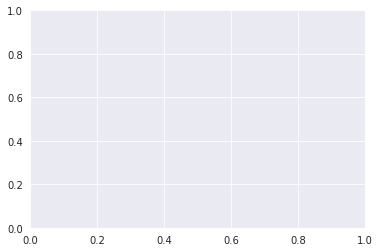

In [ ]:
fig, ax = plt.subplots()

<BarContainer object of 3 artists>

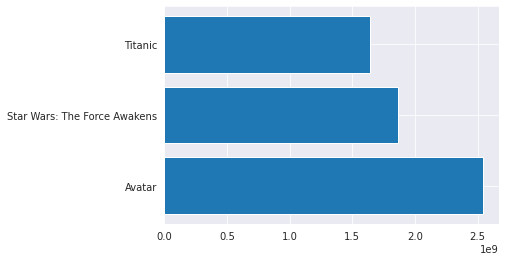

In [ ]:
fig, ax = plt.subplots()
ax.barh(df_masterQ1Most["original_title"], df_masterQ1Most["profit"])

<BarContainer object of 3 artists>

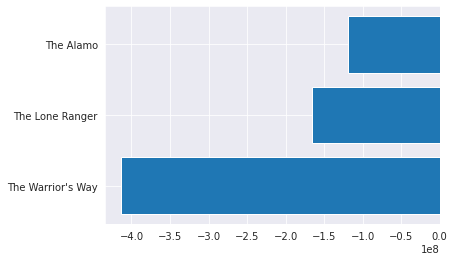

In [ ]:
fig, ax = plt.subplots()
ax.barh(df_masterQ1Least["original_title"], df_masterQ1Least["profit"])

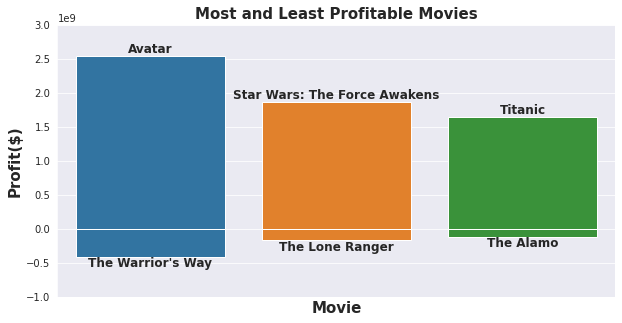

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Most and Least Profitable Movies",fontweight = "bold", fontsize=15)

sns.barplot(data=df_masterQ1Most, x= [1,2,3], y=df_masterQ1Most["profit"])
sns.barplot(data=df_masterQ1Least, x= [1,2,3], y=df_masterQ1Least["profit"])

plt.xlabel("Movie",fontweight = "bold", fontsize=15)
plt.ylabel("Profit($)",fontweight = "bold", fontsize=15)

plt.xticks(ticks=[],lables=[])


for i in range(len(df_masterQ1Most["original_title"])):
  plt.text(x=i,y=df_masterQ1Most["profit"][i] + 0.5E8,s=df_masterQ1Most["original_title"][i],ha="center",fontweight="bold", fontsize=12)

for i in range(len(df_masterQ1Least["original_title"])):
  plt.text(x=i,y=df_masterQ1Least["profit"][i]- 1.5E8,s=df_masterQ1Least["original_title"][i],ha="center",fontweight="bold", fontsize=12)

  plt.ylim(-1E9, 3E9)

## Q2. Movies market growth trends (Total buget and revenue over time)

In [ ]:
df_masterQ2 = df_master[["release_year", "budget_adj","revenue_adj"]]
df_masterQ2.sort_values(by= "release_year", ascending= True,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_masterQ2.reset_index(inplace=True,drop=True)

In [ ]:
df_masterQ2

,release_year,budget_adj,revenue_adj
0,1960,2.211890e+07,5.234807e+07
1,1960,2.211890e+07,1.843242e+08
2,1960,8.847561e+07,4.423780e+08
3,1960,1.474593e+07,3.616441e+07
4,1960,5.949601e+06,2.359350e+08
...,...,...,...
3844,2015,2.299999e+07,6.681927e+07
3845,2015,1.104000e+07,2.966837e+07
3846,2015,2.759999e+07,9.661013e+07
3847,2015,3.679998e+06,1.721430e+05


Text(0, 0.5, 'Total Amount per Year(USD)')

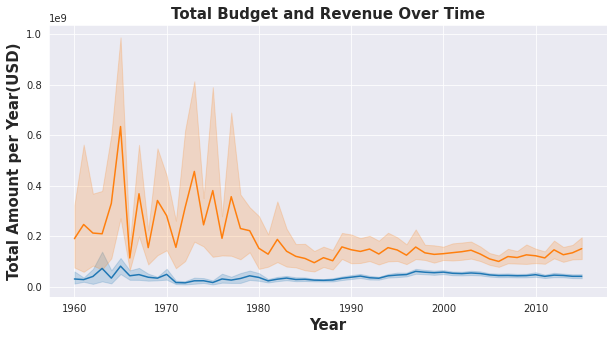

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Total Budget and Revenue Over Time",fontweight = "bold", fontsize=15)
sns.lineplot(data=df_masterQ2, x= df_masterQ2["release_year"], y=df_masterQ2["budget_adj"])
sns.lineplot(data=df_masterQ2, x= df_masterQ2["release_year"], y=df_masterQ2["revenue_adj"])

plt.xlabel("Year",fontweight = "bold", fontsize=15)
plt.ylabel("Total Amount per Year(USD)",fontweight = "bold", fontsize=15)




In [ ]:
df_masterQ2.query("release_year ==1960")["budget_adj"].sum()

153408950.48757416

In [ ]:
# try to use groupby function in pandas

In [ ]:
df_masterQ2_g = df_masterQ2.groupby(['release_year']).sum()[["budget_adj","revenue_adj"]]
df_masterQ2_g


,budget_adj,revenue_adj
release_year,,
1960,1.534090e+08,9.511497e+08
1961,2.818516e+08,2.463622e+09
1962,2.843733e+08,1.487318e+09
1963,4.351498e+08,1.256903e+09
1964,2.385733e+08,2.310241e+09
1965,4.069291e+08,3.170185e+09
1966,2.167769e+08,5.692623e+08
1967,6.242609e+08,4.783830e+09
1968,3.382106e+08,1.393100e+09


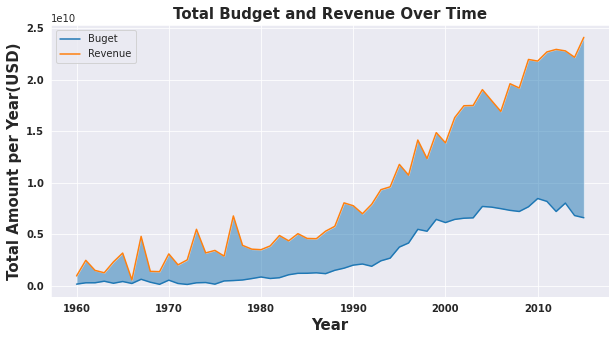

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Total Budget and Revenue Over Time",fontweight = "bold", fontsize=15)
sns.lineplot(data=df_masterQ2_g, x= df_masterQ2_g.index, y=df_masterQ2_g["budget_adj"], label = "Buget")
sns.lineplot(data=df_masterQ2_g, x= df_masterQ2_g.index, y=df_masterQ2_g["revenue_adj"],label = "Revenue")

plt.xlabel("Year",fontweight = "bold", fontsize=15)
plt.ylabel("Total Amount per Year(USD)",fontweight = "bold", fontsize=15)

plt.xticks(fontweight = "bold")
plt.yticks(fontweight = "bold")

plt.fill_between(df_masterQ2_g.index,df_masterQ2_g["budget_adj"],df_masterQ2_g["revenue_adj"], alpha = 0.5)

## Q3. Relation between vote_average and runtime?
(use joint-plot)

In [ ]:
df_masterQ3Main = df_master[["vote_average", "runtime"]]
df_masterQ3Main

,vote_average,runtime
0,6.5,124
1,7.1,120
2,6.3,119
3,7.5,136
4,7.3,137
...,...,...
3844,7.5,131
3845,6.3,128
3846,6.9,120
3847,7.0,182


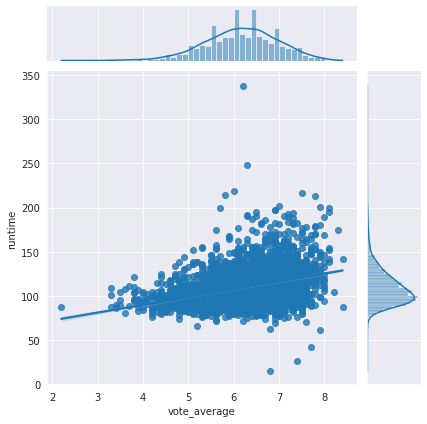

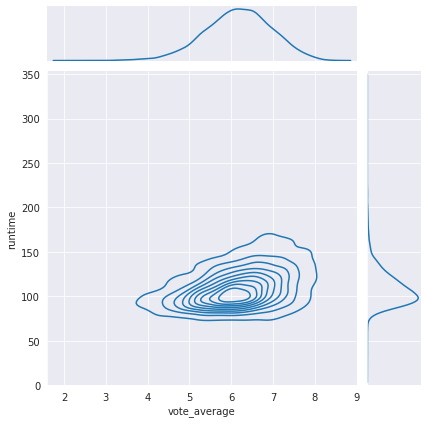

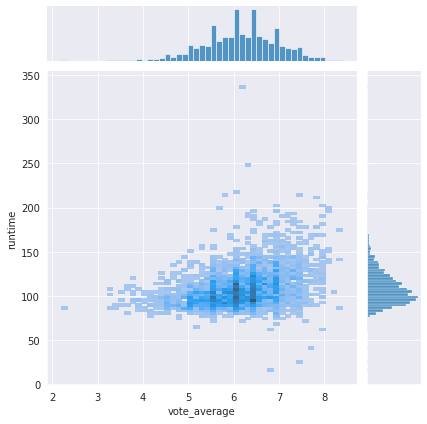

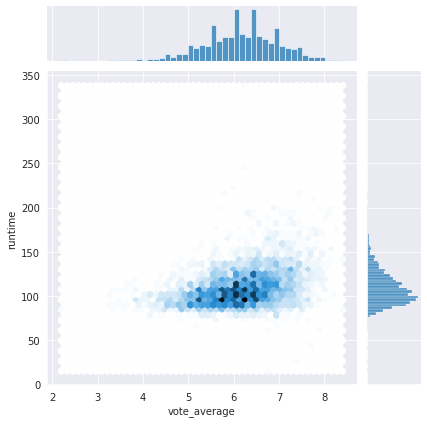

In [ ]:
sns.jointplot(data=df_masterQ3Main, x="vote_average", y="runtime",kind="reg")
sns.jointplot(data=df_masterQ3Main, x="vote_average", y="runtime",kind="kde")
sns.jointplot(data=df_masterQ3Main, x="vote_average", y="runtime",kind="hist")
sns.jointplot(data=df_masterQ3Main, x="vote_average", y="runtime",kind="hex")

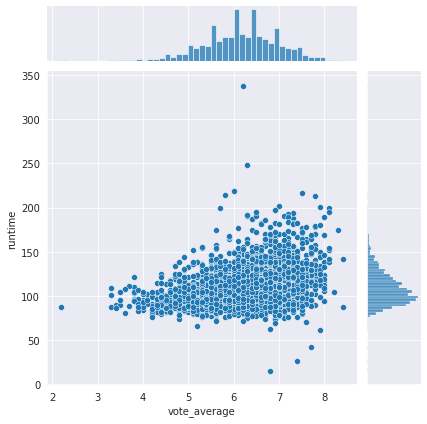

In [ ]:
sns.jointplot(data=df_masterQ3Main, x="vote_average", y="runtime",kind="scatter")

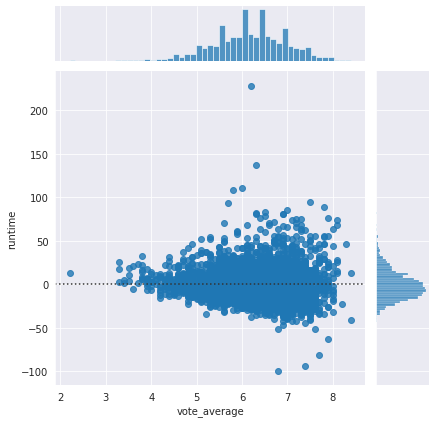

In [ ]:
sns.jointplot(data=df_masterQ3Main, x="vote_average", y="runtime",kind="resid")

### Q4. how many movies are released each year

In [ ]:
df_master

,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
3845,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
3846,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
3847,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [ ]:
df_masterQ4 = pd.DataFrame(columns = ['the year','Number of Movies'])

In [ ]:
the_year = df_master["release_year"].value_counts(ascending=True).index.tolist()
the_numberOfMovies = df_master["release_year"].value_counts(ascending=True).tolist()
the_numberOfMovies.sort()
df_masterQ4["the year"] = the_year
df_masterQ4["Number of Movies"] = the_numberOfMovies
df_masterQ4

,the year,Number of Movies
0,1969,4
1,1966,5
2,1965,5
3,1960,5
4,1963,6
5,1962,7
6,1964,7
7,1972,8
8,1968,9
9,1975,9


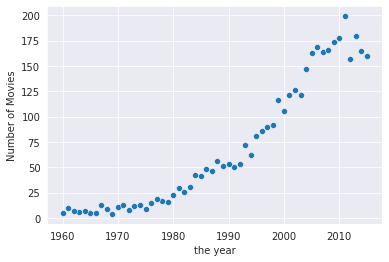

In [ ]:
sns.scatterplot(data=df_masterQ4, x="the year", y="Number of Movies")

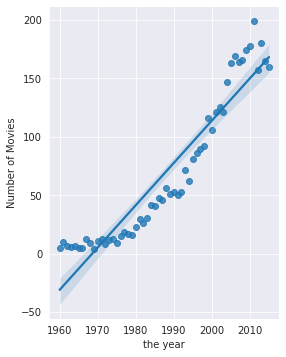

In [ ]:
sns.pairplot(df_masterQ4, x_vars=["the year"], y_vars=["Number of Movies"],
             height=5, aspect=.8, kind="reg");

In [ ]:
# can you create a list with 10 random numbers of integers less than 9(<9)
import random

temp = []

for i in range(10):
  n = random.randint(0,9)
  temp.append(n)

temp

# if numbers of items in your list is greater than 7, print the number of items
count = len(temp)
if count > 7:
  print(count)


########################## Walurs operator (  :=    )###############



if (count := len(temp)) > 7:
  print(count)


10


## Q5. Most active director and his favorite actors

In [ ]:
df_master

,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
3845,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
3846,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
3847,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [ ]:
df_masterQ5 = pd.DataFrame(columns = ['Director','The number of active'])
df_masterQ5

,director


In [ ]:
director_list = df_master["director"].value_counts(ascending=True).index.tolist()
numberOfActive = df_master["director"].value_counts(ascending=True).tolist()


df_masterQ5["director"] = director_list
df_masterQ5["The number of active"] = numberOfActive
df_masterQ5

,director,The number of active
0,Sam Levinson,1
1,Justin Zackham,1
2,Kirk De Micco|Chris Sanders,1
3,Fede Alvarez,1
4,Harmony Korine,1
...,...,...
1705,Steven Soderbergh,17
1706,Woody Allen,18
1707,Ridley Scott,21
1708,Clint Eastwood,24


In [ ]:
theMost = df_masterQ5.sort_values("The number of active", ascending=False)
theMost.iloc[0]["director"]

'Steven Spielberg'

In [ ]:
director = df_master["director"].value_counts().index[0]

In [ ]:
df_masterQ5 = df_master[df_master["director"] == director]["cast"]

In [ ]:
df_masterQ5

32      Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...
329     Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...
817     Haley Joel Osment|Frances O'Connor|Sam Robards...
937     Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray ...
1124    Jamie Bell|Andy Serkis|Daniel Craig|Nick Frost...
1139    Tom Hiddleston|Benedict Cumberbatch|Toby Kebbe...
1305    Leonardo DiCaprio|Tom Hanks|Christopher Walken...
1308    Tom Cruise|Colin Farrell|Samantha Morton|Max v...
1543    Daniel Day-Lewis|Sally Field|David Strathairn|...
1847    Morgan Freeman|Nigel Hawthorne|Anthony Hopkins...
1850    Jeff Goldblum|Julianne Moore|Pete Postlethwait...
2046    Whoopi Goldberg|Margaret Avery|Danny Glover|Ak...
2090    Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...
2140    Eric Bana|Daniel Craig|CiarÃ¡n Hinds|Mathieu K...
2432    Tom Hanks|Catherine Zeta-Jones|Stanley Tucci|C...
2762    Dan Aykroyd|Ned Beatty|John Belushi|Lorraine G...
2766    Harrison Ford|Kate Capshaw|Jonathan Ke Quan|Am...
2972    Harris

In [ ]:
df_masterQ5 = df_masterQ5.str.split("|")
df_masterQ5

32      [Tom Hanks, Mark Rylance, Amy Ryan, Alan Alda,...
329     [Richard Dreyfuss, FranÃ§ois Truffaut, Teri Ga...
817     [Haley Joel Osment, Frances O'Connor, Sam Roba...
937     [Harrison Ford, Cate Blanchett, Shia LaBeouf, ...
1124    [Jamie Bell, Andy Serkis, Daniel Craig, Nick F...
1139    [Tom Hiddleston, Benedict Cumberbatch, Toby Ke...
1305    [Leonardo DiCaprio, Tom Hanks, Christopher Wal...
1308    [Tom Cruise, Colin Farrell, Samantha Morton, M...
1543    [Daniel Day-Lewis, Sally Field, David Strathai...
1847    [Morgan Freeman, Nigel Hawthorne, Anthony Hopk...
1850    [Jeff Goldblum, Julianne Moore, Pete Postlethw...
2046    [Whoopi Goldberg, Margaret Avery, Danny Glover...
2090    [Tom Cruise, Dakota Fanning, Miranda Otto, Jus...
2140    [Eric Bana, Daniel Craig, CiarÃ¡n Hinds, Mathi...
2432    [Tom Hanks, Catherine Zeta-Jones, Stanley Tucc...
2762    [Dan Aykroyd, Ned Beatty, John Belushi, Lorrai...
2766    [Harrison Ford, Kate Capshaw, Jonathan Ke Quan...
2972    [Harri

In [ ]:
newList = []
for i in range(len(df_masterQ5)):
  # print(df_masterQ5.iloc[i])
  newList.append(df_masterQ5.iloc[i])

newList

[['Tom Hanks', 'Mark Rylance', 'Amy Ryan', 'Alan Alda', 'Sebastian Koch'],
 ['Richard Dreyfuss',
  'FranÃ§ois Truffaut',
  'Teri Garr',
  'Melinda Dillon',
  'Bob Balaban'],
 ['Haley Joel Osment',
  "Frances O'Connor",
  'Sam Robards',
  'Jake Thomas',
  'Jude Law'],
 ['Harrison Ford',
  'Cate Blanchett',
  'Shia LaBeouf',
  'Ray Winstone',
  'Karen Allen'],
 ['Jamie Bell', 'Andy Serkis', 'Daniel Craig', 'Nick Frost', 'Simon Pegg'],
 ['Tom Hiddleston',
  'Benedict Cumberbatch',
  'Toby Kebbell',
  'Emily Watson',
  'Jeremy Irvine'],
 ['Leonardo DiCaprio',
  'Tom Hanks',
  'Christopher Walken',
  'Martin Sheen',
  'Amy Adams'],
 ['Tom Cruise',
  'Colin Farrell',
  'Samantha Morton',
  'Max von Sydow',
  'Lois Smith'],
 ['Daniel Day-Lewis',
  'Sally Field',
  'David Strathairn',
  'Joseph Gordon-Levitt',
  'James Spader'],
 ['Morgan Freeman',
  'Nigel Hawthorne',
  'Anthony Hopkins',
  'Djimon Hounsou',
  'Matthew McConaughey'],
 ['Jeff Goldblum',
  'Julianne Moore',
  'Pete Postlethwait

In [ ]:
##### append vs extend

In [ ]:
cast_list = df_masterQ5.value_counts(ascending=True).index.tolist()
cast_list

castList = ''.join(str(item) for item in cast_list)
castList
# numberOfActive = df_master.value_counts(ascending=True).tolist()

'[\'Tom Hanks\', \'Mark Rylance\', \'Amy Ryan\', \'Alan Alda\', \'Sebastian Koch\'][\'Roy Scheider\', \'Robert Shaw\', \'Richard Dreyfuss\', \'Lorraine Gary\', \'Murray Hamilton\'][\'Goldie Hawn\', \'William Atherton\', \'Ben Johnson\', \'Louise Latham\', \'Michael Sacks\'][\'Robin Williams\', \'Dustin Hoffman\', \'Julia Roberts\', \'Bob Hoskins\', \'Caroline Goodall\'][\'Richard Dreyfuss\', \'Holly Hunter\', \'John Goodman\', \'Audrey Hepburn\', \'Brad Johnson\'][\'Harrison Ford\', \'Sean Connery\', \'Denholm Elliott\', \'Alison Doody\', \'John Rhys-Davies\'][\'Tom Hanks\', \'Tom Sizemore\', \'Dennis Farina\', \'Max Martini\', \'Joerg Stadler\'][\'Henry Thomas\', \'Drew Barrymore\', \'Robert MacNaughton\', \'Dee Wallace\', \'Peter Coyote\'][\'Harrison Ford\', \'Karen Allen\', \'Paul Freeman\', \'Ronald Lacey\', \'John Rhys-Davies\'][\'Harrison Ford\', \'Kate Capshaw\', \'Jonathan Ke Quan\', \'Amrish Puri\', \'Roshan Seth\'][\'Dan Aykroyd\', \'Ned Beatty\', \'John Belushi\', \'Lorraine